## FAKE NEWS DETECTION

Do we know the authencity of all the news we hear from social media? All news are not real, right? So how will you detect the fake news? The answer is Python.

Fake news are a type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media.

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as kNN

In [2]:
dframe = pd.read_csv(r"D:\GitHub\Projects\FakeNewsDetection\input\news.csv")
dframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
label = dframe.label
label.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
x_train,x_test,y_train,y_test=train_test_split(dframe['text'], label, test_size=0.2, random_state=7)

In [5]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [12]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score_1 =accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_1*100,2)}%')

Accuracy: 92.82%


In [13]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 43, 586]], dtype=int64)

In [14]:
#kNN Classifier is tried but accuracy is too low.

#DataFlair - Initialize a PassiveAggressiveClassifier
pac=kNN(n_neighbors= 3)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score_2=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_2*100,2)}%')

Accuracy: 58.88%


In [15]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[634,   4],
       [517, 112]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

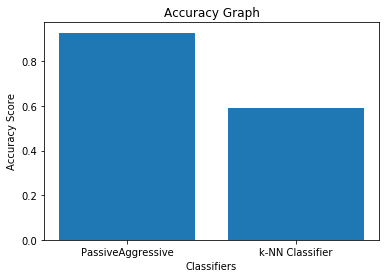

In [20]:
plt.bar(x = ['PassiveAggressive', 'k-NN Classifier'], height = [score_1, score_2])
plt.title('Accuracy Graph')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.show()